**Generative Adverserial Networks**

In [1]:
import os
import torch
import torchvision
from torchvision.transforms import Compose , ToTensor , Normalize
from torchvision.datasets import MNIST

In [2]:
mnist = MNIST(root='data',
              train=True,
              download=True,
              transform=Compose([ToTensor(),Normalize(mean=(0.5),std=(0.5))]))

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
img , label = mnist[0]
print('Label :',label)
print(img[:,10:15,10:16])
torch.min(img),torch.max(img)

Label : 5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843, -1.0000],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510, -1.0000],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647,  0.2549],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824,  0.9843]]])


(tensor(-1.), tensor(1.))

In [4]:
def denorm(x):
  out = (x+1)/2
  return out.clamp(0,1)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Label : 5


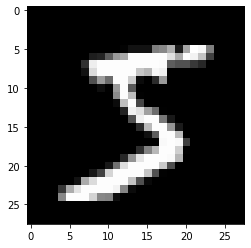

In [6]:
img_norm = denorm(img)
plt.imshow(img_norm[0],cmap='gray')
print('Label :',label)

In [7]:
from torch.utils.data import DataLoader

batch_size = 100
data_loader = DataLoader(mnist,batch_size,shuffle=True)

first batch:
torch.Size([100, 1, 28, 28])
tensor([3, 2, 6, 3, 1, 9, 9, 2, 4, 2, 0, 7, 9, 6, 5, 2, 0, 9, 8, 1, 0, 9, 0, 6,
        5, 4, 9, 4, 0, 6, 7, 0, 2, 1, 7, 1, 6, 2, 3, 6, 3, 6, 0, 9, 5, 0, 4, 6,
        3, 7, 0, 5, 9, 4, 5, 9, 9, 7, 9, 7, 0, 8, 8, 9, 1, 0, 1, 8, 2, 0, 3, 2,
        8, 7, 8, 9, 7, 7, 2, 5, 1, 0, 5, 9, 7, 5, 7, 9, 2, 1, 1, 7, 1, 9, 2, 6,
        1, 4, 2, 5])


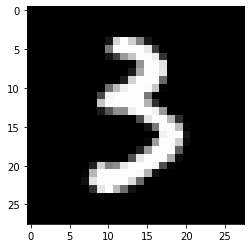

In [8]:
for img_batch,label_batch in data_loader:
  print('first batch:')
  print(img_batch.shape)
  plt.imshow(img_batch[0][0],cmap='gray')
  print(label_batch)
  break

In [9]:
# device configuration

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [10]:
# determining image size and hidden layer size

image_size = 784
hidden_size = 256

Descriminator

In [11]:
import torch.nn as nn

D = nn.Sequential(
    nn.Linear(image_size,hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size,hidden_size),
    nn.LeakyReLU(0.2),
    nn.Linear(hidden_size,1),
    nn.Sigmoid()
)

In [12]:
# LeakyReLU will be multiply negative output with passed value

In [13]:
D.to(device);

In [22]:
G

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=784, bias=True)
  (5): Tanh()
)

Generator

In [14]:
latent_size = 64

In [15]:
G = nn.Sequential(
    nn.Linear(latent_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size,image_size),
    nn.Tanh()
)

In [16]:
# Tanh() will transform values in range between -1 to 1

In [17]:
y = G(torch.randn(2,latent_size))
gen_imags = denorm(y.reshape((-1,28,28)).detach())

In [36]:
# ?y.detach

In [21]:
# detach will give only tensor value 

In [23]:
G

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=784, bias=True)
  (5): Tanh()
)

In [27]:
y = G(torch.randn(2,latent_size))
y

tensor([[-0.0150, -0.0097, -0.0462,  ..., -0.0025,  0.1747,  0.0373],
        [-0.1575,  0.0182, -0.0169,  ...,  0.1253,  0.2211,  0.0597]],
       grad_fn=<TanhBackward>)

In [28]:
y.shape

torch.Size([2, 784])

In [31]:
y.reshape(-1,28,28).shape

torch.Size([2, 28, 28])

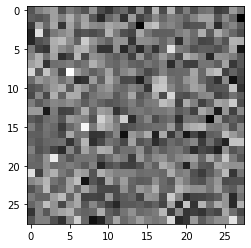

In [32]:
# watching first image
plt.imshow(gen_imags[0],cmap='gray')

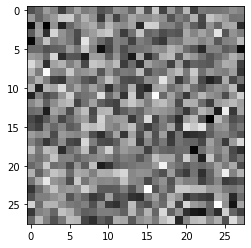

In [33]:
# watching second image
plt.imshow(gen_imags[1],cmap='gray')

In [34]:
# that will give some random noise

In [35]:
G.to(device);

Descriminator Training

In [38]:
criterion = nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(),lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(),lr=0.0002)

In [39]:
# reset gradients to zero
def reset_grad():
  d_optimizer.zero_grad()
  g_optimizer.zero_grad()

# training descriminator
def train_descriminator(images):
  # creats labels which are later used as input for BCE Loss
  real_labels = torch.ones(batch_size,1).to(device)
  fake_labels = torch.zeros(batch_size,1).to(device)

  # loss calculation for real images
  outputs = D(images)
  d_loss_real = criterion(outputs,real_labels)
  real_score = outputs

  # loss calculation fro fake images
  z = torch.randn(batch_size,latent_size).to(device)
  fake_images = G(z)
  outputs = D(fake_images)
  d_loss_fake = criterion(outputs,fake_labels)
  fake_score = outputs

  # combine losses
  d_loss = d_loss_real + d_loss_fake

  # reset gradients
  reset_grad()

  # computing gradients
  d_loss.backward()

  # adjust parameters using back propagation
  d_optimizer.step()

  return d_loss, real_score, fake_score


Generator Training

In [40]:
z = torch.randn(batch_size,latent_size).to(device)
fake_images = G(z)
D(fake_images)

tensor([[0.4886],
        [0.4864],
        [0.4894],
        [0.4907],
        [0.4892],
        [0.4880],
        [0.4872],
        [0.4873],
        [0.4875],
        [0.4876],
        [0.4848],
        [0.4849],
        [0.4879],
        [0.4874],
        [0.4870],
        [0.4888],
        [0.4905],
        [0.4888],
        [0.4886],
        [0.4902],
        [0.4879],
        [0.4905],
        [0.4895],
        [0.4898],
        [0.4869],
        [0.4864],
        [0.4887],
        [0.4885],
        [0.4875],
        [0.4912],
        [0.4899],
        [0.4872],
        [0.4863],
        [0.4863],
        [0.4898],
        [0.4903],
        [0.4866],
        [0.4889],
        [0.4905],
        [0.4879],
        [0.4895],
        [0.4901],
        [0.4882],
        [0.4865],
        [0.4900],
        [0.4868],
        [0.4859],
        [0.4866],
        [0.4881],
        [0.4880],
        [0.4886],
        [0.4889],
        [0.4899],
        [0.4881],
        [0.4860],
        [0

first we take random batch and passed that latent vector to Generator which gives fack images and we put that fake images in discriminator (we are not training discriminator we training generators only discriminator stay fix it will not affect )  discriminator gives out probability that images are real and to generator to become batter descriminator should not identify that as fake images (that probability should be near to 1) and after gradients performed next time discriminator output value will becoming to close to 1 (that means images are real)

In [41]:
# training generator
def train_generator():
  
  #generate fake images and calculate loss
  z = torch.randn(batch_size,latent_size).to(device)
  fake_images = G(z)
  labels = torch.ones(batch_size,1).to(device)
  g_loss = criterion(D(fake_images),labels)

  # back propagation and optimizing
  reset_grad()
  g_loss.backward()
  g_optimizer.step()
  return g_loss, fake_images 

Training Model

In [42]:
import os

sample_dir = 'sample'
if not os.path.exists(sample_dir):
  os.makedirs(sample_dir)

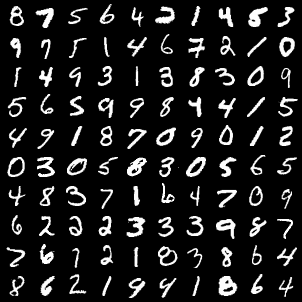

In [43]:
from IPython.display import Image
from torchvision.utils import save_image

# saving some real images
for images,_ in data_loader:
  images = images.reshape(images.size(0),1,28,28)
  save_image(denorm(images),os.path.join(sample_dir,'real_images.png'),nrow=10)
  break

Image(os.path.join(sample_dir,'real_images.png'))

Saving  fake_images-0000.png


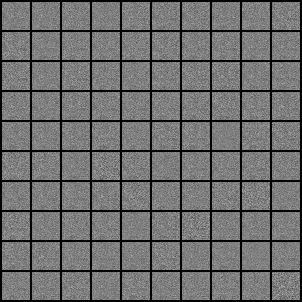

In [46]:
sample_vectors = torch.randn(batch_size,latent_size).to(device)

def save_fake_images(index):
  fake_images = G(sample_vectors)
  fake_images = fake_images.reshape(fake_images.size(0),1,28,28)
  fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
  print('Saving ',fake_fname)
  save_image(denorm(fake_images),os.path.join(sample_dir,fake_fname),nrow=10)

# before training
save_fake_images(0)
Image(os.path.join(sample_dir,'fake_images-0000.png'))

In [49]:
%%time

num_epochs = 500
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [],[],[],[]

for epoch in range(num_epochs):
  for i,(images,_) in enumerate(data_loader):
    # load a batch & transform to vector
    images = images.reshape(batch_size,-1).to(device)

    # train discriminator and generator
    d_loss,real_score,fake_score = train_descriminator(images)
    g_loss, fake_images = train_generator()

    # inspect losses
    if(i+1)%200 ==0:
      d_losses.append(d_loss.item())
      g_losses.append(g_loss.item())
      real_scores.append(real_score.mean().item())
      fake_scores.append(fake_score.mean().item())
      print('Epoch [{}/{}], Step : [{}/{}], d_loss : {:.4f}, g_loss : {:.4f}, D(x) : {:.2f}, D(G(z)) : {:.2f}'
            .format(epoch,num_epochs,i+1,total_step,d_loss.item(),g_loss.item(),
                    real_score.mean().item(),fake_score.mean().item()))
      
  # sample and save images
  save_fake_images(epoch+1)

Epoch [0/500], Step : [200/600], d_loss : 0.1694, g_loss : 4.8792, D(x) : 0.91, D(G(z)) : 0.04
Epoch [0/500], Step : [400/600], d_loss : 0.1383, g_loss : 3.8175, D(x) : 0.96, D(G(z)) : 0.07
Epoch [0/500], Step : [600/600], d_loss : 0.1506, g_loss : 3.8398, D(x) : 0.95, D(G(z)) : 0.05
Saving  fake_images-0001.png
Epoch [1/500], Step : [200/600], d_loss : 0.0775, g_loss : 4.4205, D(x) : 0.97, D(G(z)) : 0.03
Epoch [1/500], Step : [400/600], d_loss : 0.3795, g_loss : 3.7855, D(x) : 0.93, D(G(z)) : 0.16
Epoch [1/500], Step : [600/600], d_loss : 0.1202, g_loss : 3.1606, D(x) : 0.97, D(G(z)) : 0.07
Saving  fake_images-0002.png
Epoch [2/500], Step : [200/600], d_loss : 0.6025, g_loss : 5.1628, D(x) : 0.78, D(G(z)) : 0.05
Epoch [2/500], Step : [400/600], d_loss : 0.6648, g_loss : 3.1695, D(x) : 0.83, D(G(z)) : 0.22
Epoch [2/500], Step : [600/600], d_loss : 0.1227, g_loss : 3.4851, D(x) : 0.96, D(G(z)) : 0.06
Saving  fake_images-0003.png
Epoch [3/500], Step : [200/600], d_loss : 0.6060, g_loss :

In [50]:
# save model checkpoints
torch.save(G.state_dict(),'G.ckpt')
torch.save(D.state_dict(),'D.ckpt')

In [51]:
import cv2
import os
from IPython.display import FileLink

vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir,f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort() 

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'),8,(320,320))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink('gans_training.avi')

/content/gans_training.avi

Text(0.5, 1.0, 'Losses')

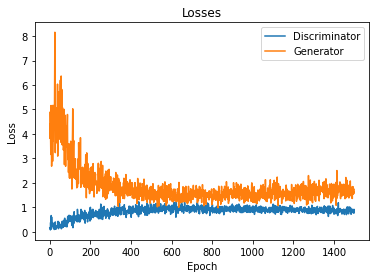

In [53]:
plt.plot(d_losses,'-')
plt.plot(g_losses,'-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Discriminator','Generator'])
plt.title('Losses')

Text(0.5, 1.0, 'Scores')

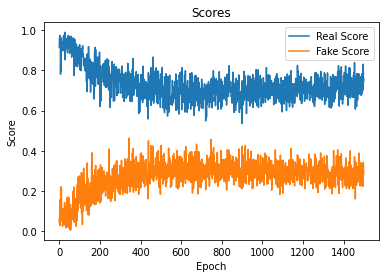

In [54]:
plt.plot(real_scores,'-')
plt.plot(fake_scores,'-')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend(['Real Score','Fake Score'])
plt.title('Scores')